<h1>All Plots</h1>

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import h5py
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
mp = 1.672622e-24 # mass of hydrogren atom, in grams
kb = 1.380658e-16 # boltzmann constant in ergs/K

In [4]:
dnamein='./hdf5/' # directory where the file is located
dnameout='./png/' # directory where the plot will be saved

In [5]:
f = h5py.File('200_512_f32.h5', 'r') # open the hdf5 file for reading
head = f.attrs # read the header attributes into a structure, called head

In [6]:
head.keys()

<KeysViewHDF5 ['density_unit', 'dims', 'dt', 'dx', 'energy_unit', 'gamma', 'length_unit', 'mass_unit', 'n_fields', 'n_step', 't', 'time_unit', 'velocity_unit']>

In [7]:
f.keys()

<KeysViewHDF5 ['Energy', 'GasEnergy', 'density', 'momentum_x', 'momentum_y', 'momentum_z']>

In [8]:
gamma = head['gamma'] # ratio of specific heats
t  = head['t'] # time of this snapshot, in kyr
nx = head['dims'][0] # number of cells in the x direction
ny = head['dims'][1] # number of cells in the y direction
nz = head['dims'][2] # number of cells in the z direction
dx = head['dx'][0] # width of cell in x direction
dy = head['dx'][1] # width of cell in y direction
dz = head['dx'][2] # width of cell in z direction
l_c = head['length_unit']
t_c = head['time_unit']
m_c = head['mass_unit']
d_c = head['density_unit']                 
v_c = head['velocity_unit']
e_c = head['energy_unit']
p_c = e_c # pressure units are the same as energy density units, density*velocity^2/length^3

In [9]:
d = f['density'][:]
GE = f['GasEnergy'][:]
px = f['momentum_x'][:]
py = f['momentum_y'][:]
pz = f['momentum_z'][:]

In [10]:
f.close()

In [11]:
mu = 1.0

d = d*d_c
n = d/(mu*mp) #number density

In [12]:
P = GE * (gamma - 1.0) * p_c #pressure

In [13]:
T = P / (n * kb) #temperature

In [14]:
km = 1e-5

Vx = (px*v_c*km)/d #velocity in the x direction
Vy = (py*v_c*km)/d #velocity in the y direction
Vz = (pz*v_c*km)/d #velocity in the z direction

In [15]:
print('\t min \t\t\t max')
print('n: ', np.min(n) , '\t' , np.max(n))
print('T: ', np.min(T) , '\t' , np.max(T))
print('P: ', np.min(P) , '\t' , np.max(P))
print('Vx: ', np.min(Vx) , '\t' , np.max(Vx))
print('Vy: ', np.min(Vy) , '\t' , np.max(Vy))
print('Vz: ', np.min(Vz) , '\t' , np.max(Vz))

	 min 			 max
n:  0.0005926918238401413 	 292.1434631347656
T:  250.40210778793897 	 32938641.21378435
P:  1.955283159311328e-13 	 1.3565781506533717e-10
Vx:  -1.0254285057527924e+26 	 8.137504005091809e+26
Vy:  -3.725538522698933e+26 	 2.7941417954823794e+26
Vz:  -3.2944650430734195e+26 	 2.968495099994314e+26


<h2>Slices</h2>

In [24]:
#Number Density Slices
nslice_xz = np.log10(n[:,int(ny/2),:])
nslice_xy = np.log10(n[:,:,int(nz/2)])
nslice_yz = np.log10(n[int(nx/2),:,:])

In [25]:
#Temperature Slices
Tslice_xz = np.log10(T[:,int(ny/2),:])
Tslice_xy = np.log10(T[:,:,int(nz/2)])
Tslice_yz = np.log10(T[int(nx/2),:,:])

In [18]:
#Pressure Slices
Pslice_xz = P[:,int(ny/2),:]
Pslice_xy = P[:,:,int(nz/2)]
Pslice_yz = P[int(nx/2),:,:]

In [19]:
#Velocity in the x-direction Slices
Vxslice_xz = Vx[:,int(ny/2),:]
Vxslice_xy = Vx[:,:,int(nz/2)]
Vxslice_yz = Vx[int(nx/2),:,:]

In [20]:
#Velocity in the y-direction Slices
Vyslice_xz = Vy[:,int(ny/2),:]
Vyslice_xy = Vy[:,:,int(nz/2)]
Vyslice_yz = Vy[int(nx/2),:,:]

In [21]:
#Velocity in the z-direction Slices
Vzslice_xz = Vz[:,int(ny/2),:]
Vzslice_xy = Vz[:,:,int(nz/2)]
Vzslice_yz = Vz[int(nx/2),:,:]

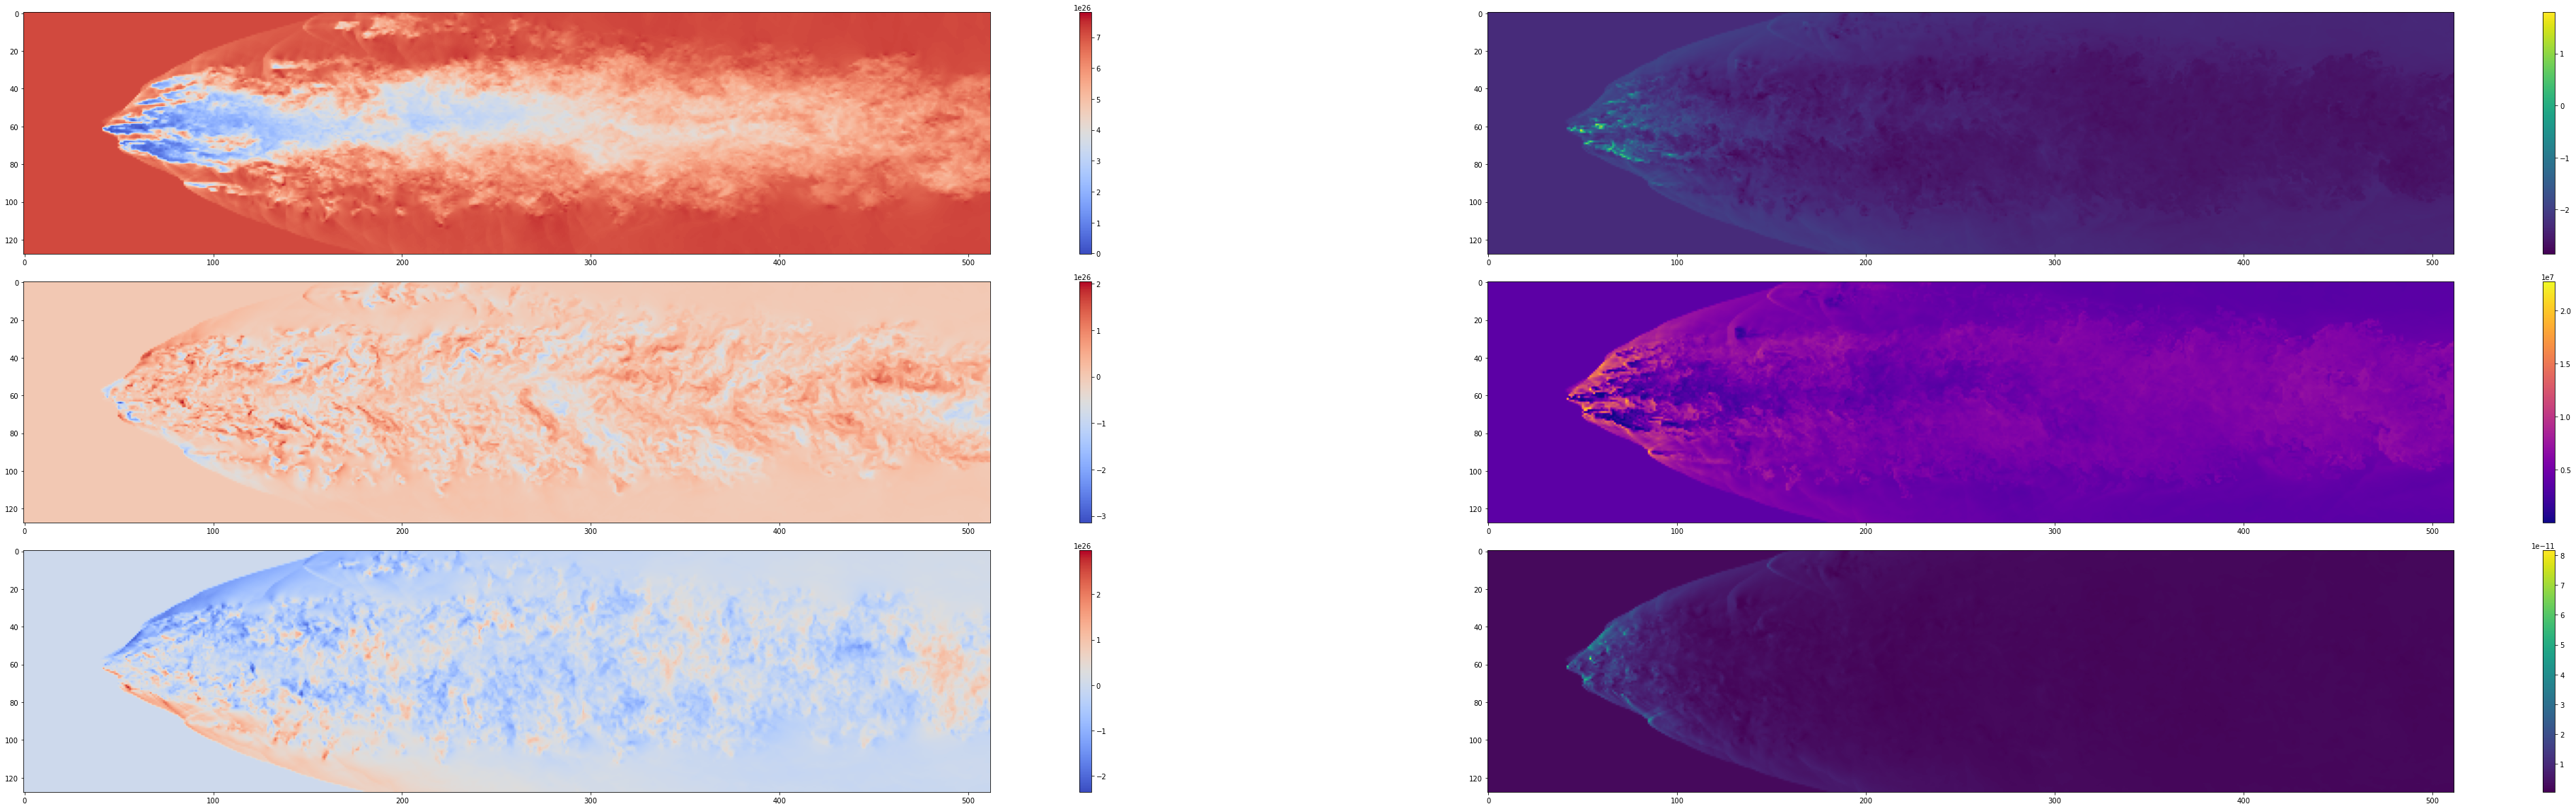

In [22]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(64,16))

im = ax1.imshow(Vxslice_xz.T, label='X Velocity', cmap='coolwarm')
plt.colorbar(im, ax=ax1)

im = ax2.imshow(nslice_xz.T, label='Number Density')
plt.colorbar(im, ax=ax2)

im = ax3.imshow(Vyslice_xz.T, label='Y Velocity', cmap='coolwarm')
plt.colorbar(im, ax=ax3)

im = ax4.imshow(Tslice_xz.T, label='Temperature', cmap='plasma')
plt.colorbar(im, ax=ax4)

im = ax5.imshow(Vzslice_xz.T, label='Z Velocity', cmap='coolwarm')
plt.colorbar(im, ax=ax5)

im = ax6.imshow(Pslice_xz.T, label='Pressure')
plt.colorbar(im, ax=ax6)

plt.tight_layout()
#plt.savefig('..\Plots\all_slices.png', bbox_inches='tight')